In [7]:
#%matplotlib notebook
import sys
import os

# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

# tools for applying bundle adjustment to a temporal sequence of satellite images
import bundle_adjust.ba_timeseries as ba_timeseries

# Display and interface settings (just for the notebook interface)
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load scene

#############################################################
Loading scene RB_ZAF_0001...

Found 85 different dates in the scene timeline

Total images in timeline: 560
Successfully loaded scene RB_ZAF_0001
#############################################################




Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Scene RB_ZAF_0001 characterized using the following example dsm:
/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_dsms/s103_20190627T074821Z__s103_20190627T074854Z__s103_20190627T074931Z.tiff



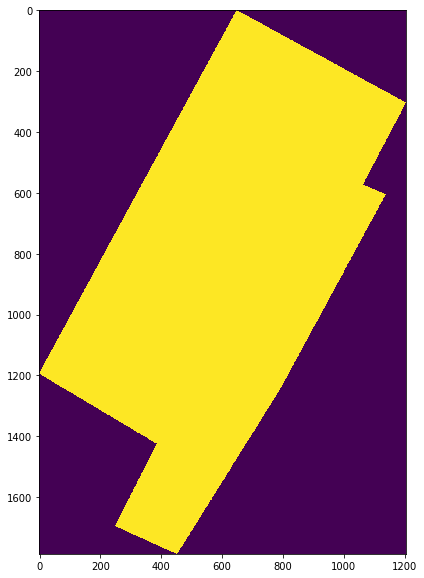

In [3]:
scene_name = 'RB_ZAF_0001'

input_dir = '/home/carlo/dsms-timeseries-for-roger'
output_dir = 'exp'

scene = ba_timeseries.Scene(input_dir, output_dir, scene_name, 'v1', \
                            compute_aoi_masks=True, use_aoi_masks_to_equalize_crops=False)
scene.display_aoi()

source_dsms_dir = '{}/{}_dsms'.format(scene.src_dir, scene_name)
example_dsm_fname = os.path.join(source_dsms_dir, \
                                 's103_20190627T074821Z__s103_20190627T074854Z__s103_20190627T074931Z.tiff')
scene.characterize_from_example_dsm(example_dsm_fname)
scene.display_dsm_mask()

### Select date(s) of the scene to adjust

In [13]:
timeline_indices = [0, 3, 6, 7, 8] # 0, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16 contain no errors

scene.get_timeline_attributes(timeline_indices, ['datetime', 'n_images'])

index  |  datetime             |  n_images
__________________________________________

0      |  2019-06-08 07:53:52  |  5       
3      |  2019-06-17 07:51:38  |  9       
6      |  2019-06-27 07:48:21  |  7       
7      |  2019-06-29 10:47:31  |  8       
8      |  2019-06-30 10:44:24  |  4       
__________________________________________

                                  33 total




In [5]:
scene.tracks_config = {'s2p': False,
                       'matching_thr': 0.6,
                       'use_masks': False,
                       'filter_pairs': True,
                       'max_kp': 3000,
                       'optimal_subset': False,
                       'K': 30}

### Bundle Adjustment

In [35]:
scene.run_sequential_bundle_adjustment(timeline_indices, n_previous=1, reset=True, verbose=False)

Chosen 5 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views
(4) 2019-06-29 10:47:31 --> 8 views
(5) 2019-06-30 10:44:24 --> 4 views



Running bundle ajustment sequentially, each date aligned with 1 previous date(s) !
(1) 2019-06-08 07:53:52 adjusted in 9 seconds, (723, 52) tracks employed
(2) 2019-06-17 07:51:38 adjusted in 35 seconds, (2452, 159) tracks employed
(3) 2019-06-27 07:48:21 adjusted in 35 seconds, (2962, 194) tracks employed
(4) 2019-06-29 10:47:31 adjusted in 25 seconds, (2794, 189) tracks employed
(5) 2019-06-30 10:44:24 adjusted in 21 seconds, (2170, 166) tracks employed



TOTAL TIME: 00:02:05.00





In [41]:
scene.run_sequential_bundle_adjustment(timeline_indices, n_previous=1, reset=True, verbose=True)

Chosen 5 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views
(4) 2019-06-29 10:47:31 --> 8 views
(5) 2019-06-30 10:44:24 --> 4 views



Running bundle ajustment sequentially, each date aligned with 1 previous date(s) !
Bundle adjusting date 2019-06-08 07:53:52...
No previously adjusted data was found in scene RB_ZAF_0001

5 new images for bundle adjustment ! 

Loading 5 image rpcs / 5
Done!

Loading 5 image rpcs / 5
Done!

Loading 5 image crops / 5
Done!


Bundle Adjustment input data is ready !

Approximating RPCs as Perspective projection matrices
5 projection matrices / 5 (0 err)
Done!

Building feature tracks - satellite scenario - using opencv SIFT

Parameters:
      use_masks:    False
      matching_thr: 0.6



Running feature detection...

Found 3000 keypoints in image 0
Found 3000 keypoints in image 1
Found 3000 keypoints in image 2
Found 3000 keypoints in image 3
Found 3000 keypoin

Found 3000 keypoints in image 1
Found 3000 keypoints in image 2
Found 3000 keypoints in image 3
Found 3000 keypoints in image 4
Found 3000 keypoints in image 5
Found 3000 keypoints in image 6

...done in 6.281798115000129 seconds

Computing pairs to match...

58 / 120 pairs to be matched
58 new pairs to be matched

...done in 0.011927489191293716 seconds

Matching...

Pair (0,9) -> 290 matches
Pair (0,13) -> 25 matches
Pair (0,15) -> 0 matches
Pair (1,10) -> 659 matches
Pair (1,11) -> 21 matches
Pair (1,12) -> 227 matches
Pair (1,14) -> 32 matches
Pair (2,9) -> 310 matches
Pair (2,10) -> 403 matches
Pair (2,11) -> 134 matches
Pair (2,12) -> 9 matches
Pair (2,13) -> 21 matches
Pair (2,14) -> 7 matches
Pair (2,15) -> 10 matches
Pair (3,10) -> 179 matches
Pair (3,11) -> 124 matches
Pair (3,12) -> 1284 matches
Pair (3,14) -> 256 matches
Pair (4,9) -> 65 matches
Pair (4,10) -> 90 matches
Pair (4,11) -> 983 matches
Pair (4,12) -> 86 matches
Pair (4,13) -> 57 matches
Pair (4,14) -> 61 matches

Loading 8 image crops / 8
Done!

4 new images for bundle adjustment ! 

Loading 4 image rpcs / 4
Done!

Loading 4 image rpcs / 4
Done!

Loading 4 image crops / 4
Done!


Bundle Adjustment input data is ready !

Approximating RPCs as Perspective projection matrices
12 projection matrices / 12 (0 err)
Done!

Building feature tracks - satellite scenario - using opencv SIFT

Parameters:
      use_masks:    False
      matching_thr: 0.6



Running feature detection...

Found 3000 keypoints in image 0
Found 3000 keypoints in image 1
Found 3000 keypoints in image 2
Found 3000 keypoints in image 3

...done in 3.69901966676116 seconds

Computing pairs to match...

29 / 66 pairs to be matched
29 new pairs to be matched

...done in 0.008730024099349976 seconds

Matching...

Pair (0,8) -> 15 matches
Pair (0,9) -> 202 matches
Pair (0,10) -> 25 matches
Pair (1,8) -> 174 matches
Pair (1,9) -> 53 matches
Pair (1,10) -> 17 matches
Pair (1,11) -> 7 matches
Pair (2,8) -> 830 matches
Pair (2,10) -> 77 mat

Displaying feature track with index 2099, length 2

3D location (initial)  : [ 4739715.61264574  2968552.54437742 -3056291.25848965]
3D location (after BA) : [ 4739690.36565534  2968572.47007672 -3056316.6622887 ] 

 ----> Real 2D loc in im 8  (yellow) =  [794.25646973 748.57141113]
 ----> Proj 2D loc in im 8  before BA (red) =  [795.08567603 748.75065065]
 ----> Proj 2D loc in im 8  after  BA (green) =  [793.89776513 748.49386706]
              Reprojection error beofre BA: 1.0084458176156659
              Reprojection error after  BA: 0.43624867366440867


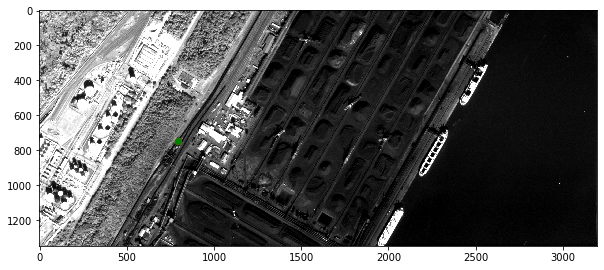

 ----> Real 2D loc in im 11  (yellow) =  [988.21057129 162.07421875]
 ----> Proj 2D loc in im 11  before BA (red) =  [987.6226868  161.93151544]
 ----> Proj 2D loc in im 11  after  BA (green) =  [988.46581088 162.1374383 ]
              Reprojection error beofre BA: 0.7305878005730904
              Reprojection error after  BA: 0.3184591329977309


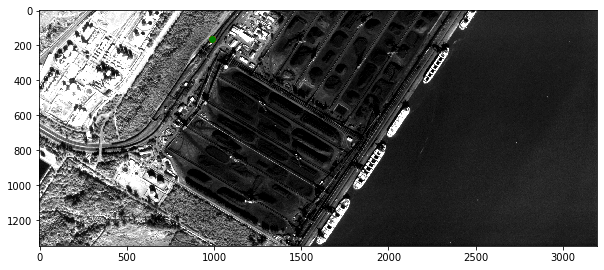

Mean reprojection error before BA: 0.8695168090943781
Mean reprojection error after BA: 0.3773539033310698


In [43]:
scene.ba_pipeline.visualize_feature_track()

In [25]:
scene.run_sequential_bundle_adjustment(timeline_indices, n_previous=0, reset=True, verbose=False)

Chosen 5 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views
(4) 2019-06-29 10:47:31 --> 8 views
(5) 2019-06-30 10:44:24 --> 4 views



Running bundle ajustment sequentially, each date aligned with 0 previous date(s) !
(1) 2019-06-08 07:53:52 adjusted in 11 seconds, (1600, 49) tracks employed
(2) 2019-06-17 07:51:38 adjusted in 24 seconds, (3621, 240) tracks employed
(3) 2019-06-27 07:48:21 adjusted in 16 seconds, (3096, 110) tracks employed
(4) 2019-06-29 10:47:31 adjusted in 18 seconds, (3016, 172) tracks employed
(5) 2019-06-30 10:44:24 adjusted in 8 seconds, (1529, 103) tracks employed



TOTAL TIME: 00:01:17.00





In [44]:
scene.run_global_bundle_adjustment(timeline_indices, reset=True, verbose=False)

#scene.timeline_instances_diagram(timeline_indices, scene.ba_pipeline, neighbors=1)
#scene.compare_timeline_instances([0], [3], scene.ba_pipeline)

Chosen 5 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views
(4) 2019-06-29 10:47:31 --> 8 views
(5) 2019-06-30 10:44:24 --> 4 views



Running bundle ajustment all at once !
All dates adjusted in 82 seconds, (5635, 422) tracks employed

TOTAL TIME: 00:01:22.00





In [71]:
scene.run_out_of_core_bundle_adjustment(timeline_indices, reset=True, verbose=False, parallelize=False)

Chosen 5 dates of the timeline to bundle adjust:
(1) 2019-06-08 07:53:52 --> 5 views
(2) 2019-06-17 07:51:38 --> 9 views
(3) 2019-06-27 07:48:21 --> 7 views
(4) 2019-06-29 10:47:31 --> 8 views
(5) 2019-06-30 10:44:24 --> 4 views


########################
 Running out of core BA 
########################
- Local sweep completed in 62 seconds (average per date: 12 s)
Loading 1 image rpcs / 1
Done!

Loading 1 image rpcs / 1
Done!

Loading 1 image rpcs / 1
Done!

Loading 1 image rpcs / 1
Done!

Loading 1 image rpcs / 1
Done!

Loading 5 image crops / 5
Done!

- Global sweep completed in 11 seconds

TOTAL TIME: 00:00:11.00



Loading 1 image rpcs / 1
Done!

Loading 1 image crops / 1
Done!

Loading 4 image rpcs / 4
Done!

Loading 4 image crops / 4
Done!

Loading 1 image rpcs / 1
Done!

Loading 1 image crops / 1
Done!

Loading 8 image rpcs / 8
Done!

Loading 8 image crops / 8
Done!

Loading 1 image rpcs / 1
Done!

Loading 1 image crops / 1
Done!

Loading 6 image rpcs / 6
Done!

Loading 6 imag

In [48]:
scene.timeline[timeline_indices[0]]

{'datetime': datetime.datetime(2019, 6, 8, 7, 53, 52),
 'id': 's4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z',
 'fnames': ['/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images/s4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z/20190608_075352_ssc2d2_0010_basic_panchromatic_dn.tif',
  '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images/s4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z/20190608_075352_ssc2d2_0009_basic_panchromatic_dn.tif',
  '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images/s4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z/20190608_075352_ssc2d2_0008_basic_panchromatic_dn.tif',
  '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images/s4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z/20190608_075428_ssc2d2_0013_basic_panchromatic_dn.tif',
  '/home/carlo/dsms-timeseries-for-roger/RB_ZAF_0001/RB_ZAF_0001_images/s4_20190608T075318Z__s4_2019060

In [145]:
C = scene.ba_pipeline.C 
P = scene.ba_pipeline.input_P
cam_model = scene.ba_pipeline.cam_model
pairs_to_triangulate = scene.ba_pipeline.pairs_to_triangulate

from feature_tracks import ft_ranking

import timeit

start = timeit.default_timer()


print(cam_weights)

print(timeit.default_timer() - start)

[3.0333549318496345, 2.070870833285235, 3.026609365208581, 2.088744700363029]
0.14204860851168633


593 pairwise matches to display for pair (0,1)


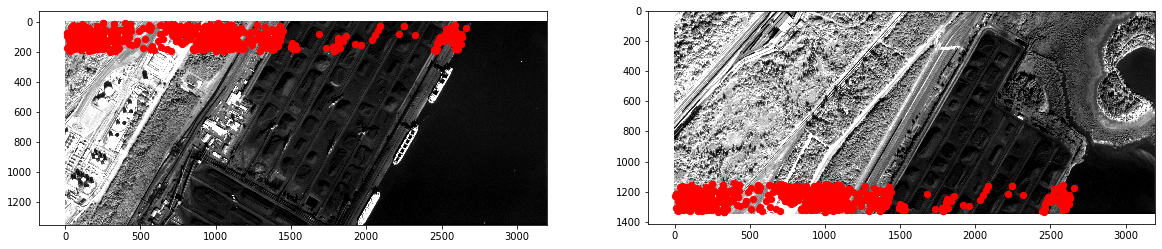

In [152]:
from feature_tracks import ft_utils

ft_utils.plot_pairwise_matches_stereo_pair(0, 1, scene.ba_pipeline.features,
                                           scene.ba_pipeline.pairwise_matches, scene.ba_pipeline.input_seq)

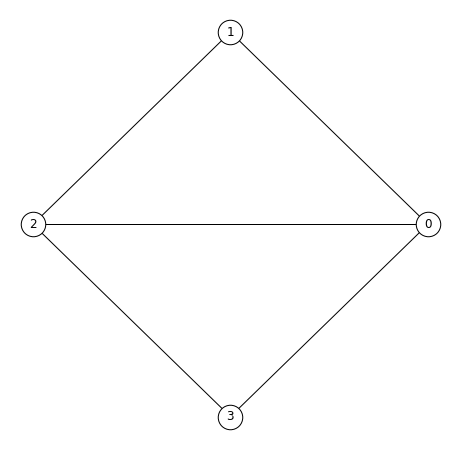

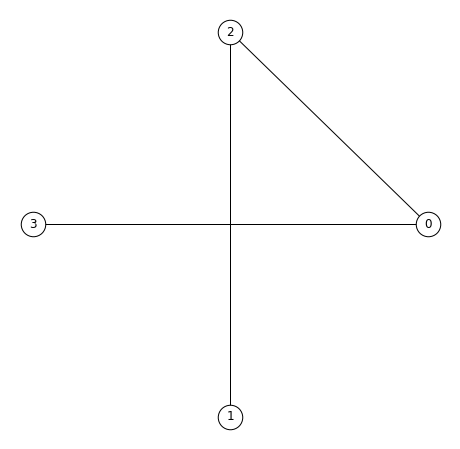

array([[  0.,  87., 415., 500.],
       [ 87.,   0., 778.,   0.],
       [415., 778.,   0.,  77.],
       [500.,   0.,  77.,   0.]])

In [156]:
from bundle_adjust import ba_utils

ba_utils.plot_connectivity_graph(C, 50, save_pgf=False)

ba_utils.plot_connectivity_graph(C, 100, save_pgf=False)


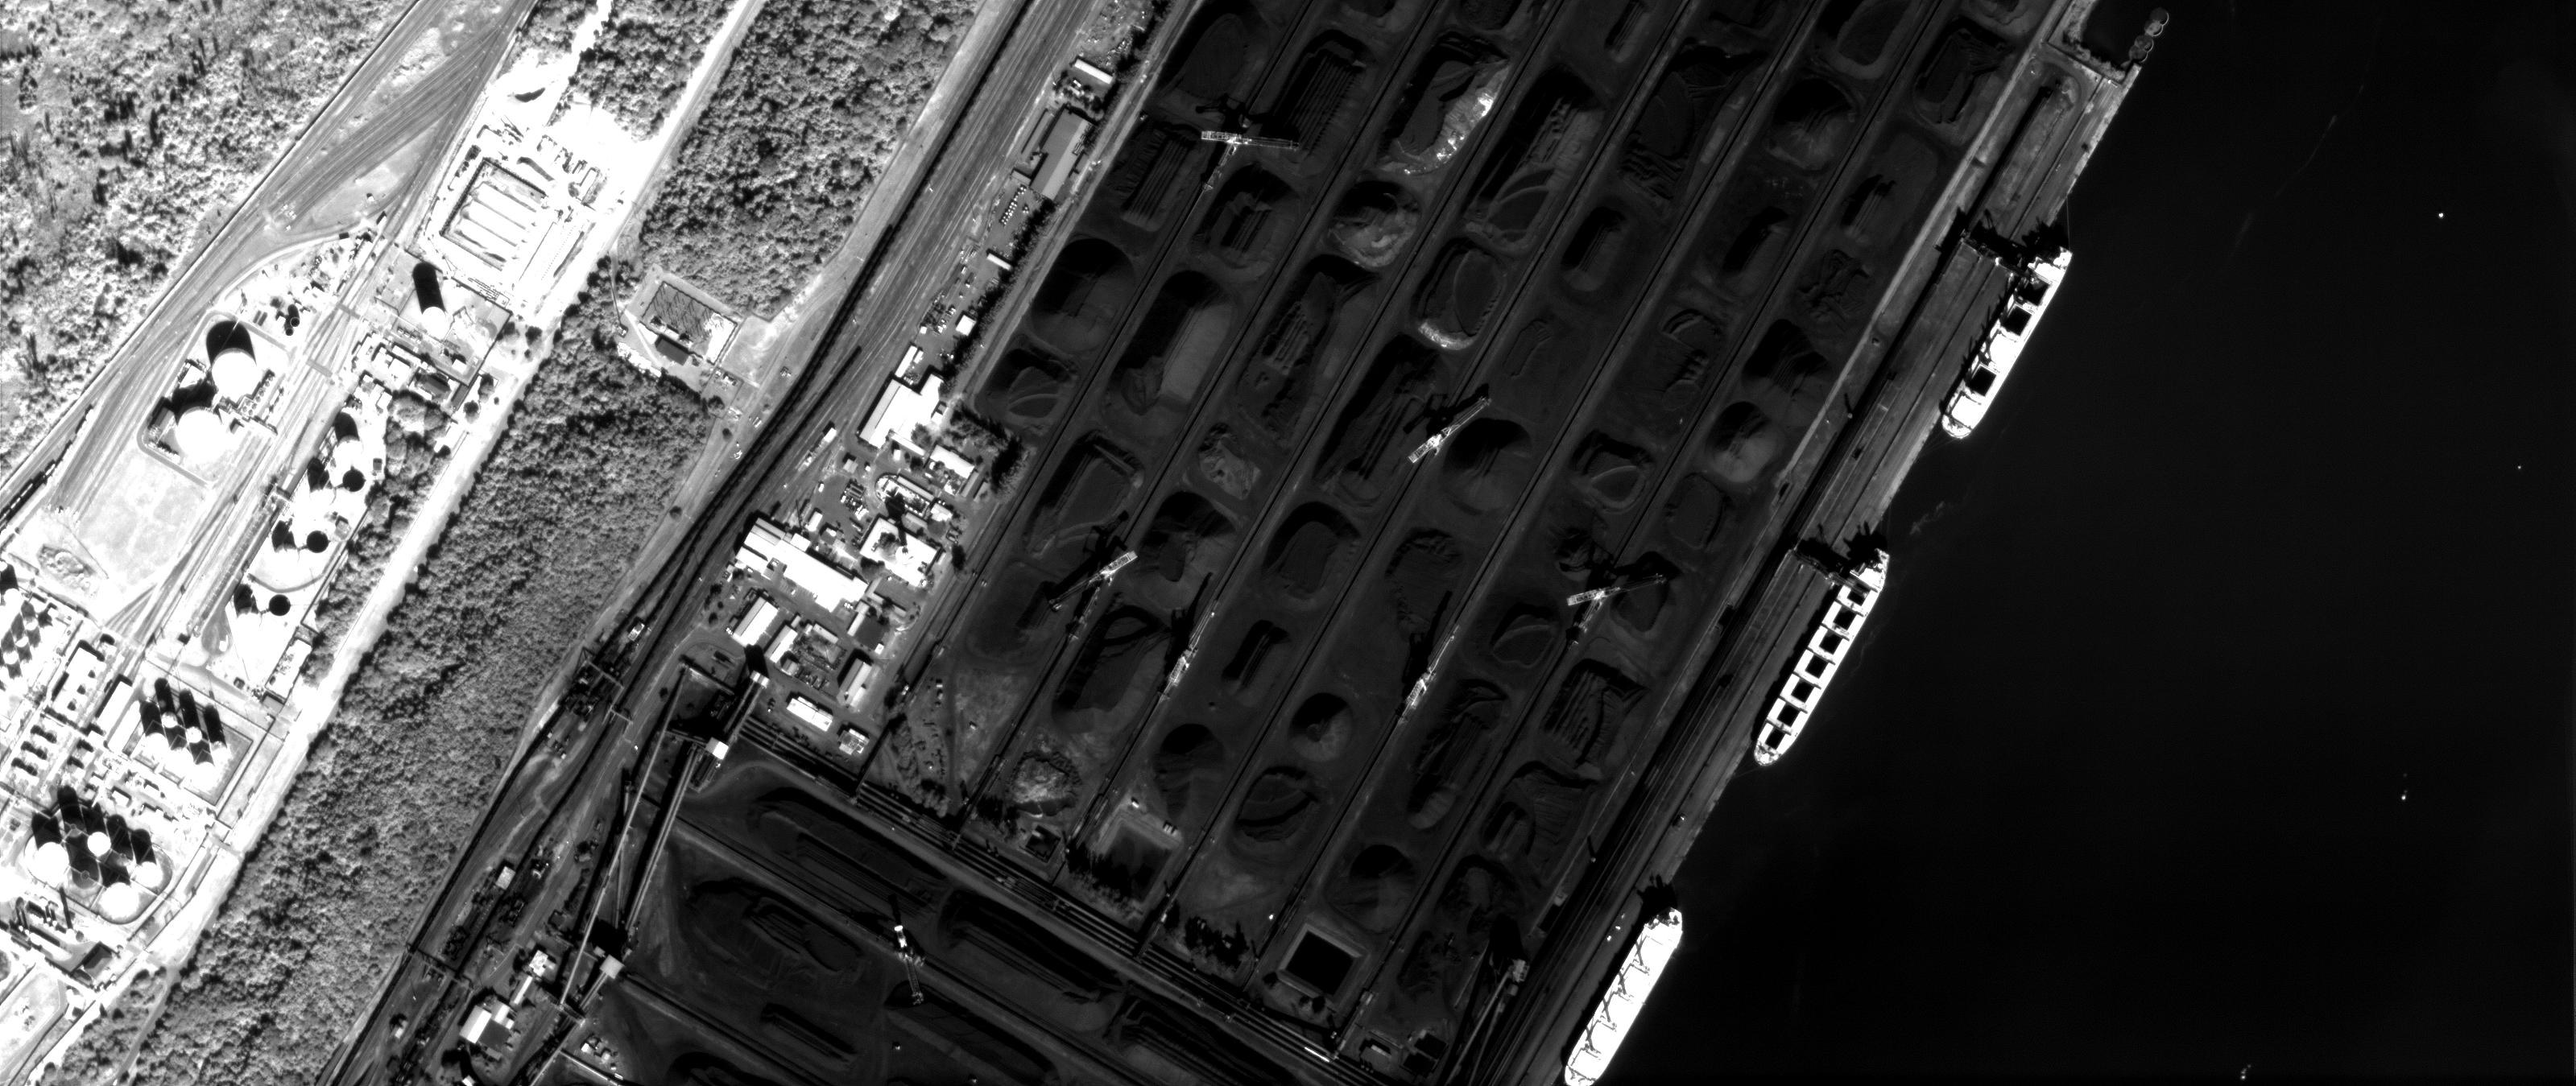
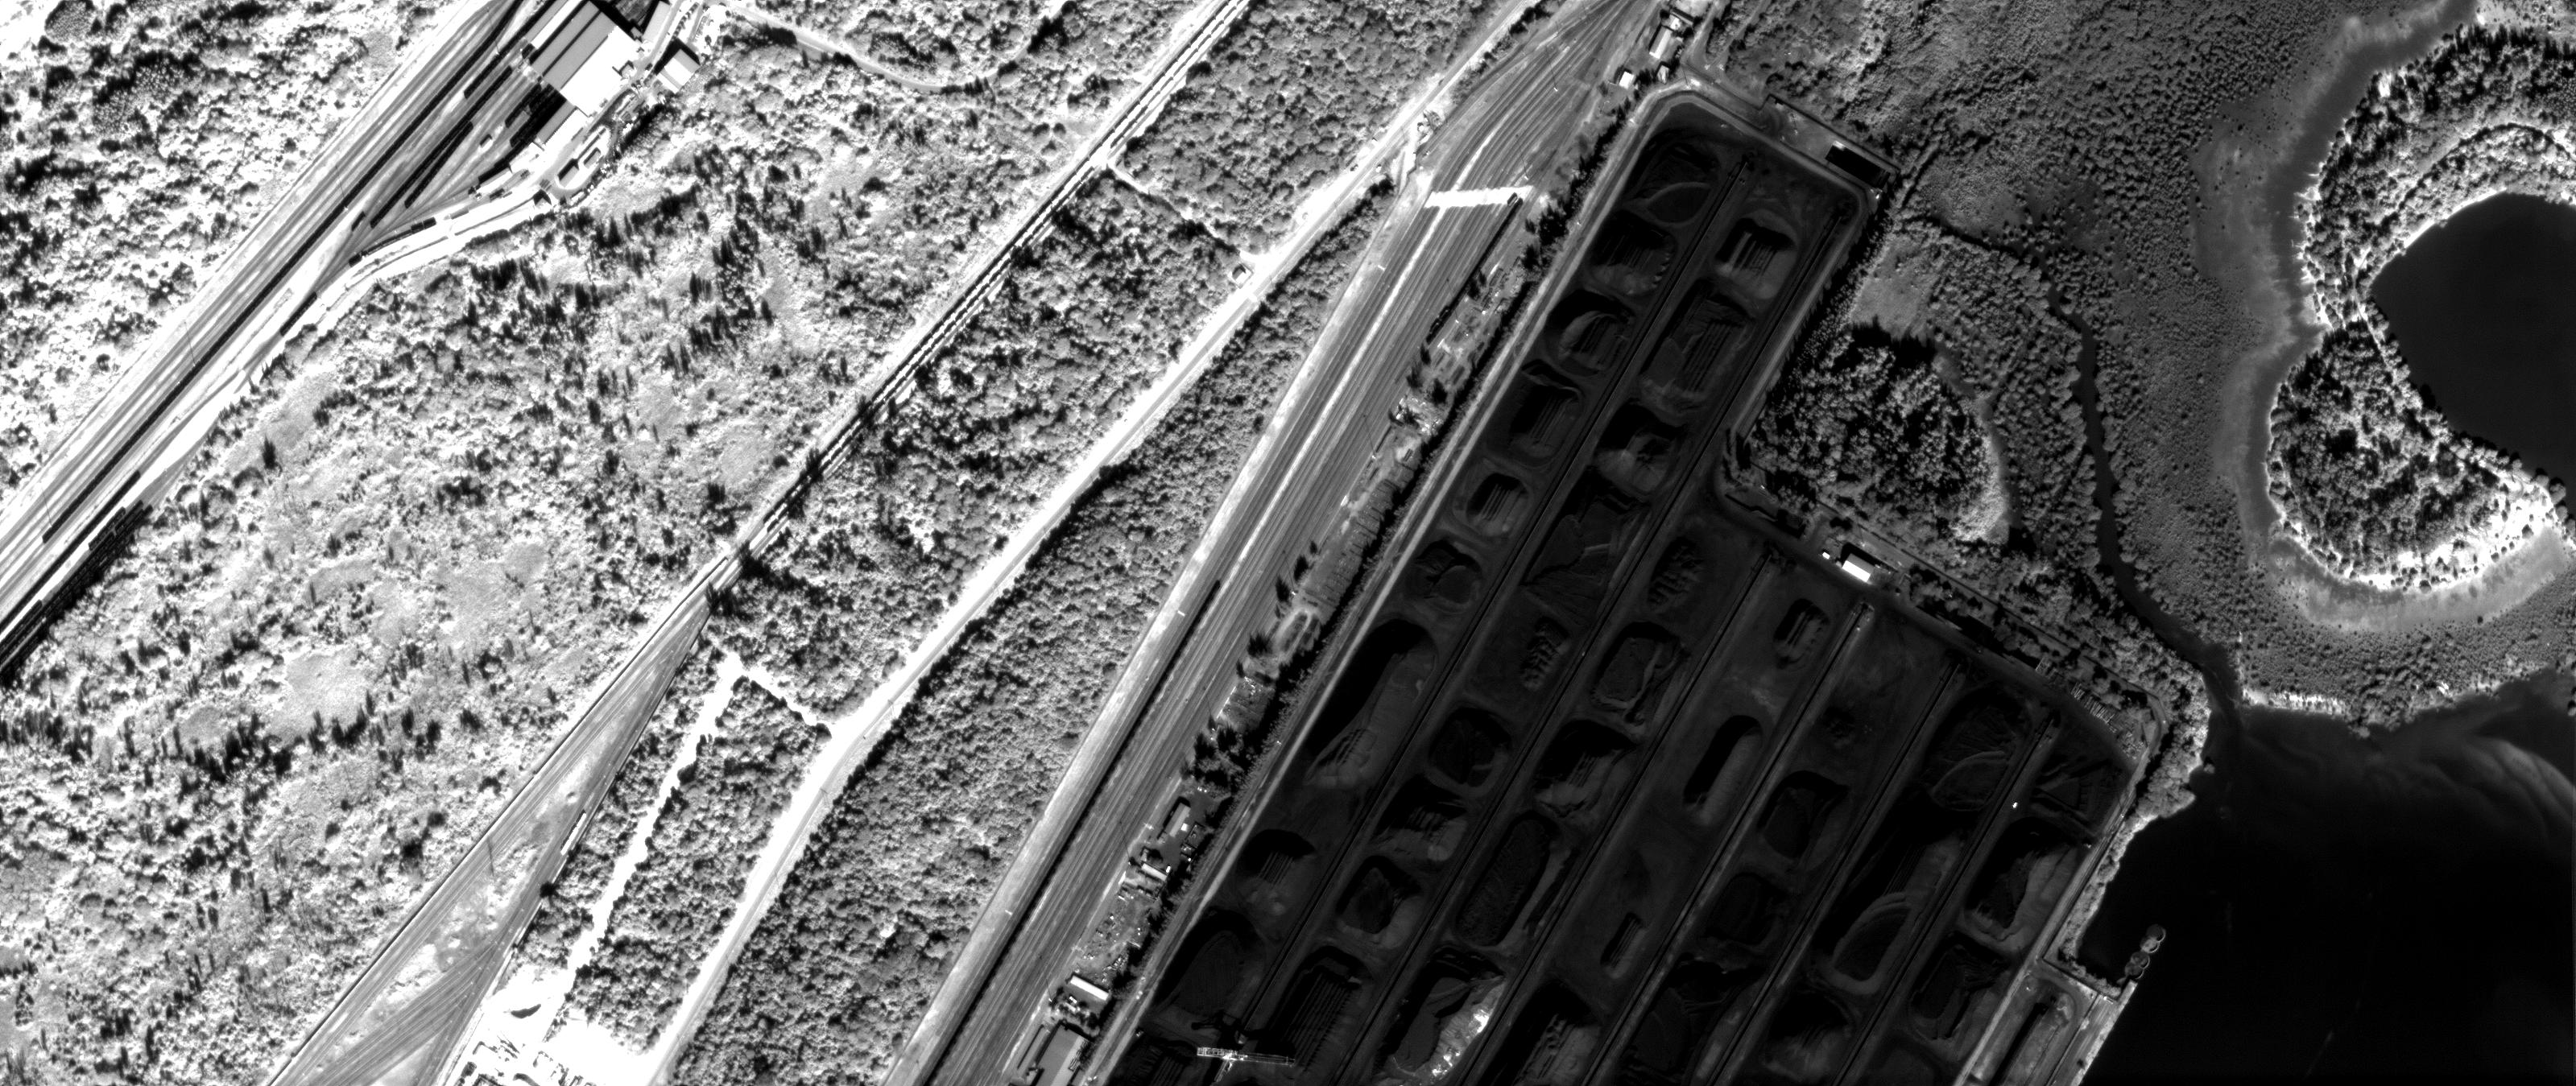
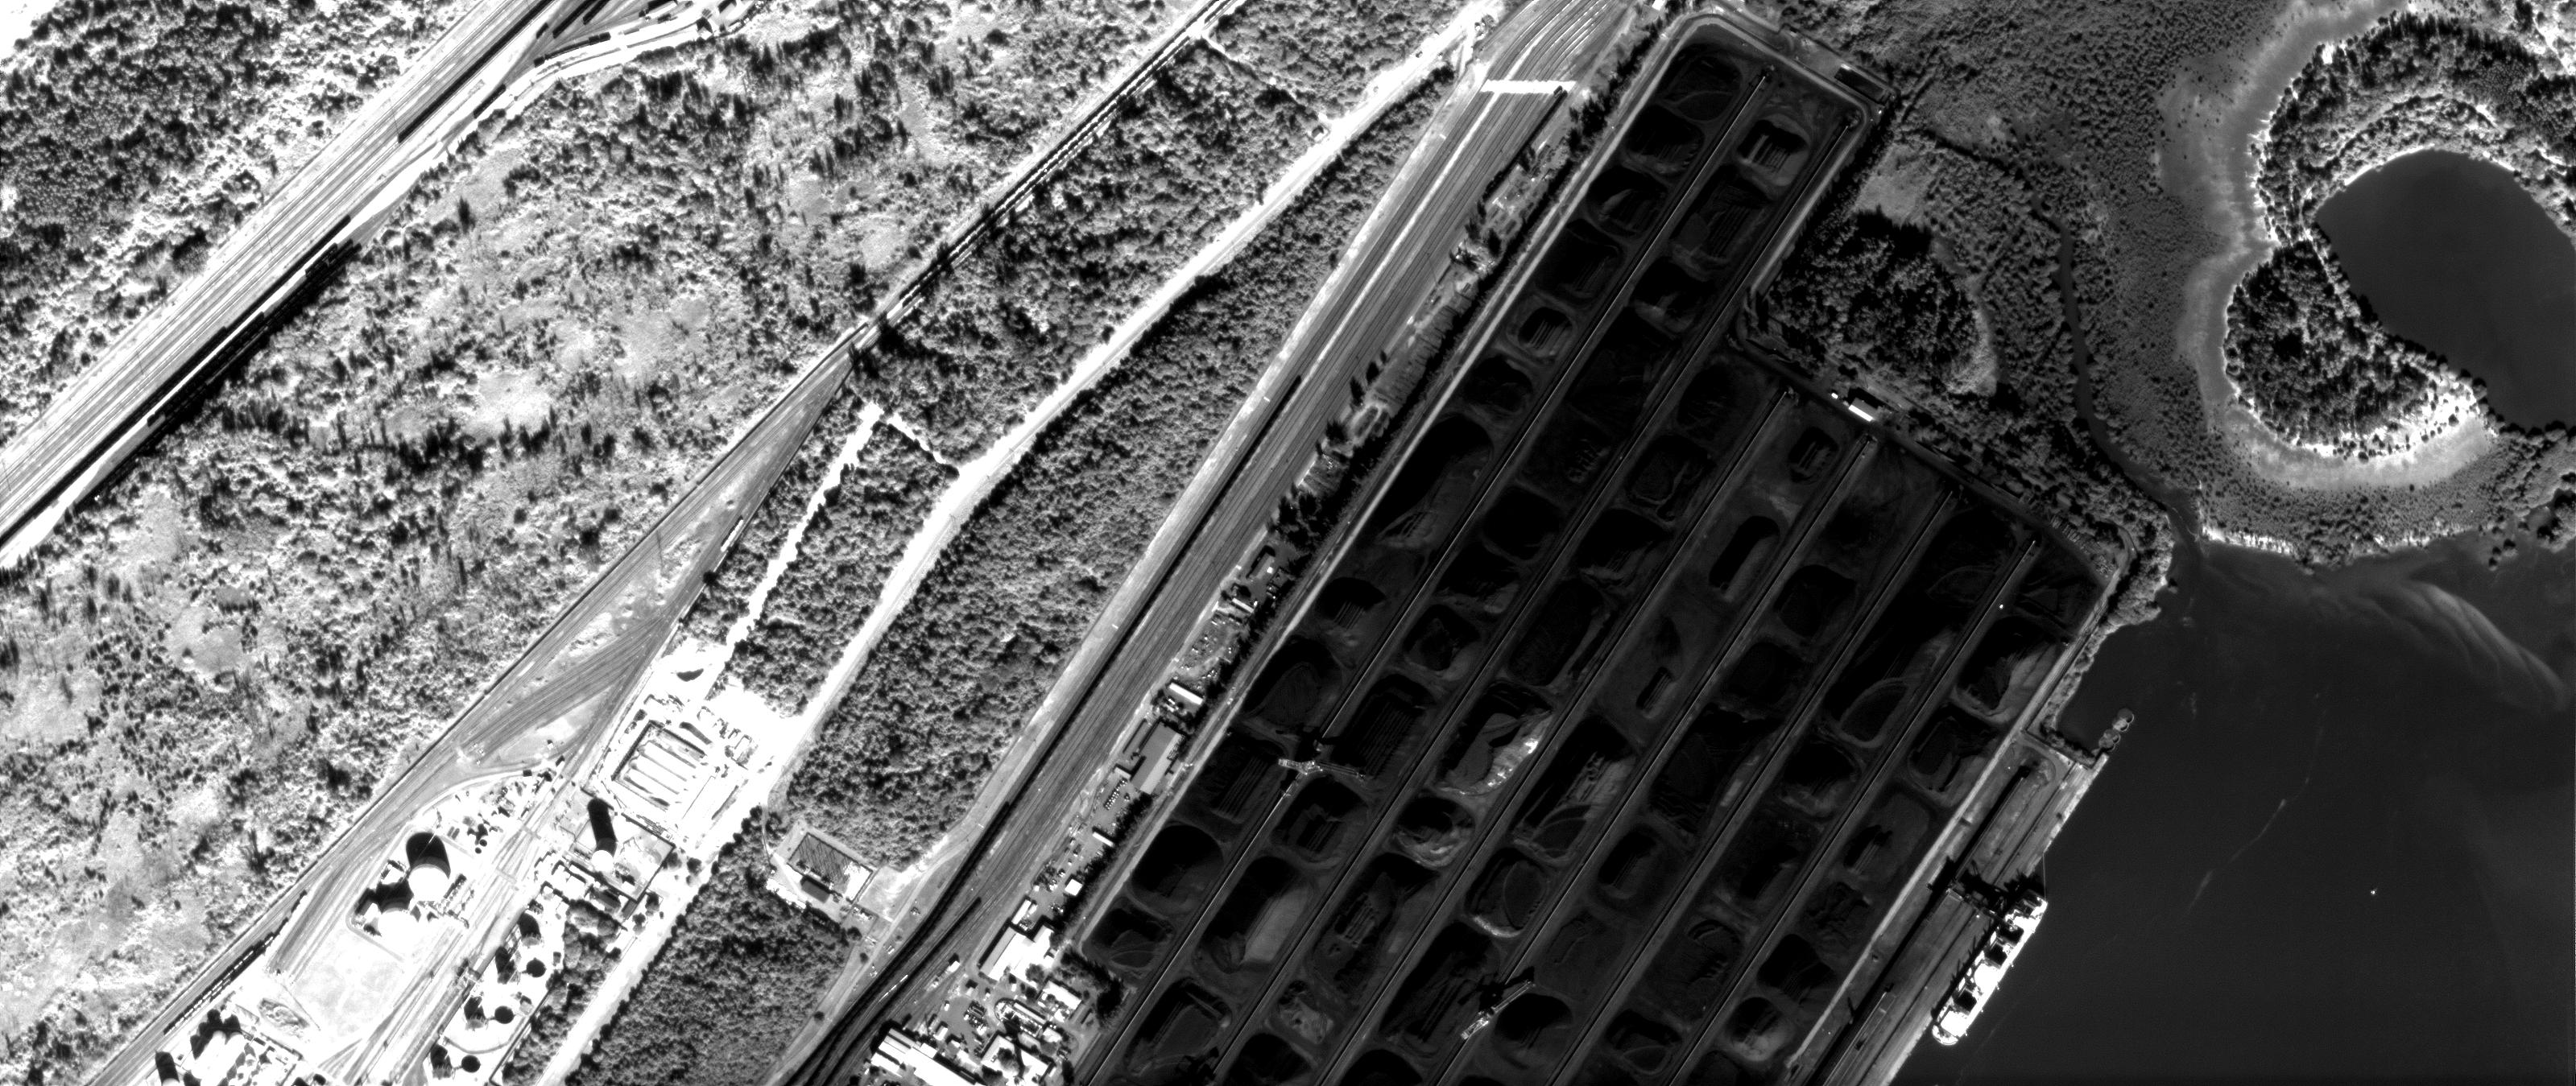
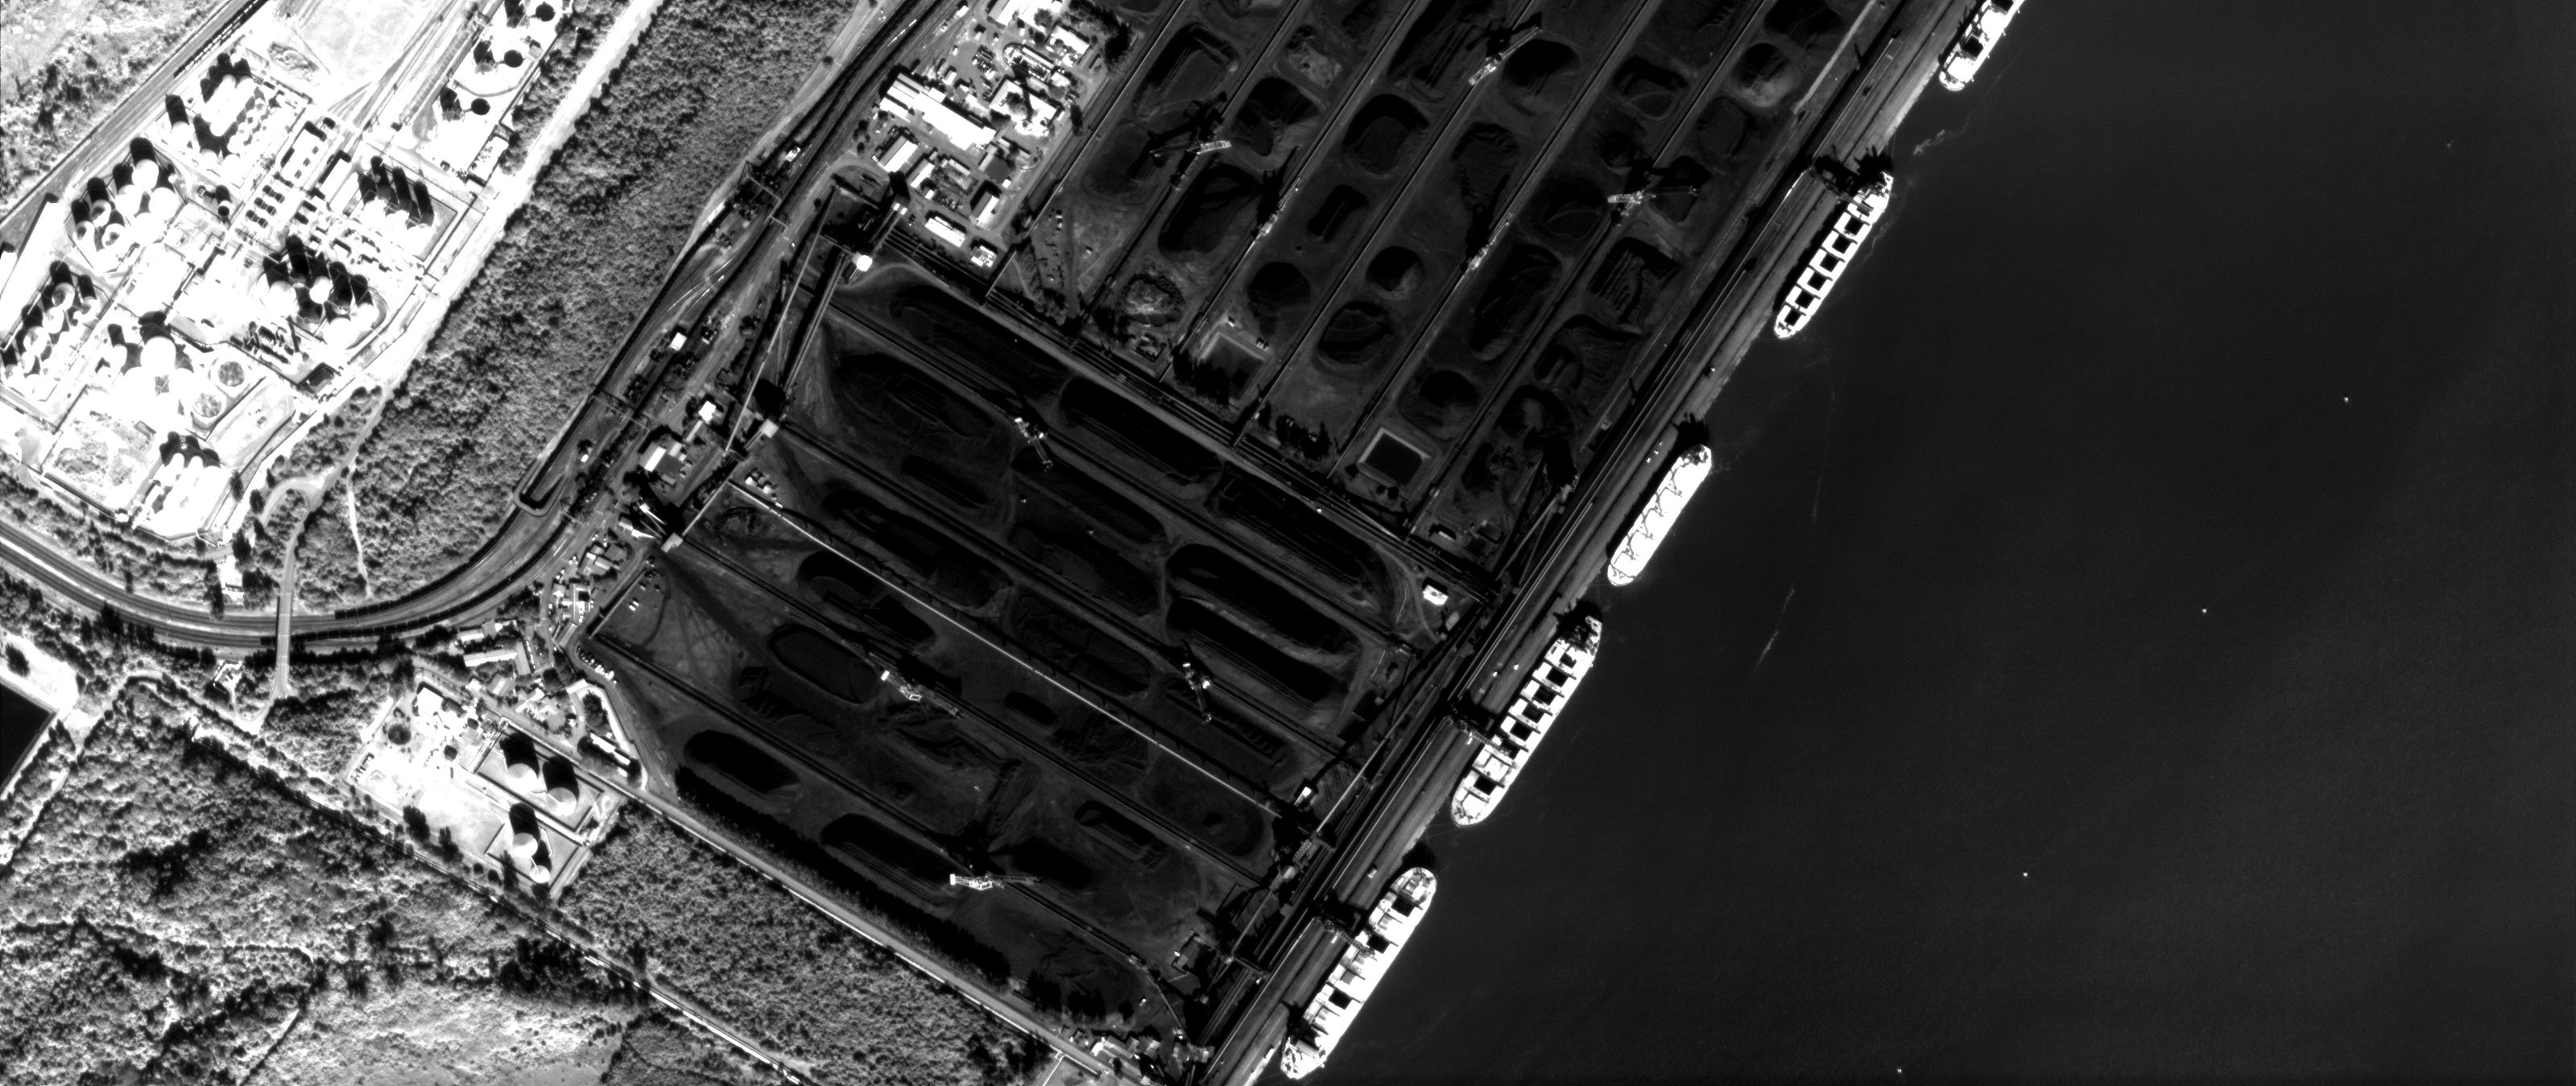

In [146]:
scene.display_crops()

Displaying feature track with index 4522, length 7

3D location (initial)  : [ 4739637.01022739  2967545.39575526 -3057370.04486127]
3D location (after BA) : [ 4739573.97491556  2967576.73735594 -3057400.2076406 ] 

 ----> Real 2D loc in im 13  (sol) =  [1848.34484863 1126.0802002 ]
 ----> Proj 2D loc in im 13  before BA =  [1852.20465737 1126.29043804]
 ----> Proj 2D loc in im 13  after  BA =  [1849.13222121 1126.26109504]
              Reprojection error beofre BA: 4.070046581878614
              Reprojection error after  BA: 0.9682674208961544


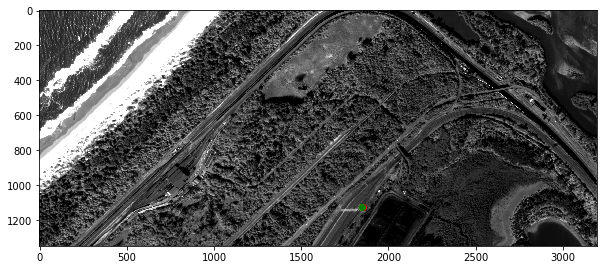

 ----> Real 2D loc in im 19  (sol) =  [1925.97827148  520.14886475]
 ----> Proj 2D loc in im 19  before BA =  [1928.53071602  518.55213611]
 ----> Proj 2D loc in im 19  after  BA =  [1926.33489305  519.939362  ]
              Reprojection error beofre BA: 4.149173168367156
              Reprojection error after  BA: 0.5661243058866603


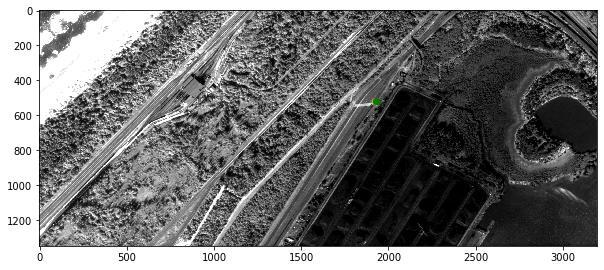

 ----> Real 2D loc in im 24  (sol) =  [1716.59680176 1108.34301758]
 ----> Proj 2D loc in im 24  before BA =  [1713.55620634 1108.14533599]
 ----> Proj 2D loc in im 24  after  BA =  [1716.4501953  1108.51187071]
              Reprojection error beofre BA: 3.238277000396465
              Reprojection error after  BA: 0.3154595900837194


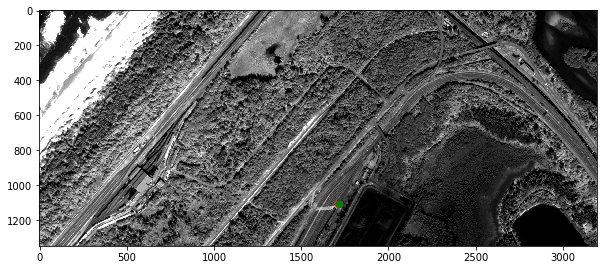

 ----> Real 2D loc in im 26  (sol) =  [1808.16455078   84.11643982]
 ----> Proj 2D loc in im 26  before BA =  [1807.99895388   84.83352062]
 ----> Proj 2D loc in im 26  after  BA =  [1808.11919359   84.5303387 ]
              Reprojection error beofre BA: 0.882677702294302
              Reprojection error after  BA: 0.4592560744582812


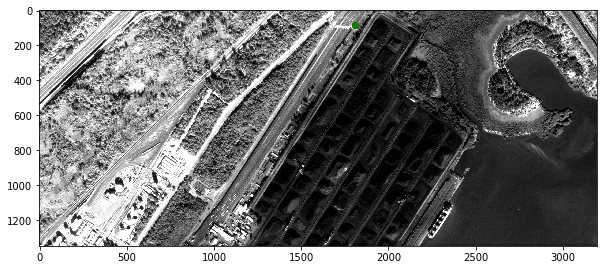

 ----> Real 2D loc in im 27  (sol) =  [1796.77502441 1218.19677734]
 ----> Proj 2D loc in im 27  before BA =  [1797.08931318 1219.17661023]
 ----> Proj 2D loc in im 27  after  BA =  [1796.97356534 1218.63112714]
              Reprojection error beofre BA: 1.2941216570441156
              Reprojection error after  BA: 0.6328907200602316


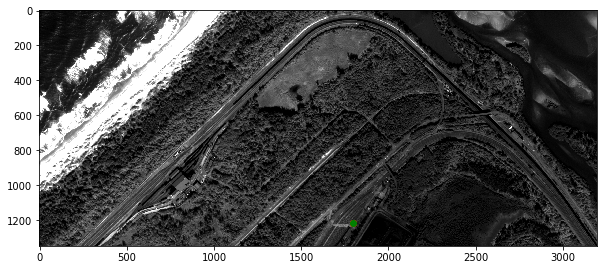

 ----> Real 2D loc in im 30  (sol) =  [1905.63586426  221.15258789]
 ----> Proj 2D loc in im 30  before BA =  [1903.41569825  222.8707852 ]
 ----> Proj 2D loc in im 30  after  BA =  [1904.65597532  220.92012056]
              Reprojection error beofre BA: 3.938363321455938
              Reprojection error after  BA: 1.2123562688878167


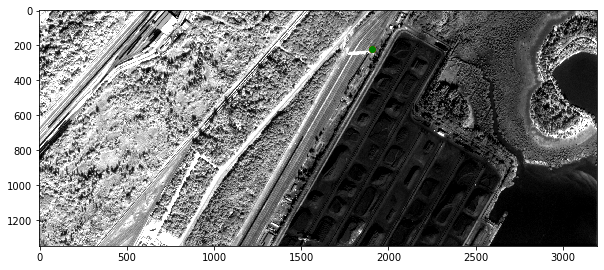

 ----> Real 2D loc in im 31  (sol) =  [1958.5123291    93.29353333]
 ----> Proj 2D loc in im 31  before BA =  [1957.87621145   92.87363719]
 ----> Proj 2D loc in im 31  after  BA =  [1958.42583173   92.55675274]
              Reprojection error beofre BA: 1.056013781772819
              Reprojection error after  BA: 0.8232779500941092


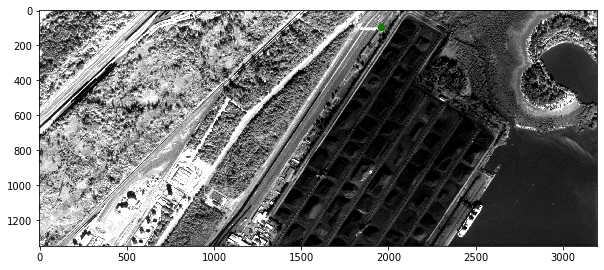

Mean reprojection error before BA: 2.661239030458487
Mean reprojection error after BA: 0.7110903329095676


In [93]:
scene.ba_pipeline.visualize_feature_track()

In [10]:
scene.ba_pipeline.save_feature_tracks_as_svg(scene.dst_dir)


Image crops were saved at exp/RB_ZAF_0001/images


SIFT keypoints were saved at exp/RB_ZAF_0001/features/sift_all_kp


Feature tracks and their reprojection were saved at exp/RB_ZAF_0001



# Reconstruct scene

### Compute s2p DSMs with corrected RPCs

In [6]:
for t_idx in timeline_indices:
    scene.reconstruct_date(t_idx)


###################################################################################
Reconstructing scene RB_ZAF_0001 at time 2019-06-08 07:53:52
Timeline id: s4_20190608T075318Z__s4_20190608T075352Z__s4_20190608T075428Z
###################################################################################

Running s2p...

Computed 4 dsms / 4 (0 err)

Merging dsms...

Done!



###################################################################################
Reconstructing scene RB_ZAF_0001 at time 2019-06-17 07:51:38
Timeline id: s4_20190617T075138Z__s4_20190617T075212Z__s4_20190617T075248Z
###################################################################################

Running s2p...

Computed 10 dsms / 10 (0 err)

Merging dsms...

Done!



###################################################################################
Reconstructing scene RB_ZAF_0001 at time 2019-06-27 07:48:21
Timeline id: s103_20190627T074821Z__s103_20190627T074854Z__s103_20190627T074931Z
###################

In [8]:
scene.compute_3D_statistics_over_time(timeline_indices)


Computing 4D statistics of the timeseries! Chosen dates:
2019-06-08 07:53:52
2019-06-17 07:51:38
2019-06-27 07:48:21
2019-06-29 10:47:31
2019-06-30 10:44:24

Done! Results were saved at exp/RB_ZAF_0001/4Dstats
